In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

C:\Users\akash\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\akash\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('C:/Users/akash/Downloads/Meta Dataset.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.189480,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,33.993931,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,30.967144,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,31.966084,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,32.994991,50237200
...,...,...,...,...,...,...,...
3023,2024-05-24,467.619995,479.850006,466.299988,478.220001,478.220001,12012300
3024,2024-05-28,476.579987,480.859985,474.839996,479.920013,479.920013,10175800
3025,2024-05-29,474.660004,479.850006,473.700012,474.359985,474.359985,9226200
3026,2024-05-30,471.670013,471.730011,464.709991,467.049988,467.049988,10735200


# Exploratory Data Analysis

# Non Graphical Analysis

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.189480,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,33.993931,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,30.967144,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,31.966084,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,32.994991,50237200


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3023,2024-05-24,467.619995,479.850006,466.299988,478.220001,478.220001,12012300
3024,2024-05-28,476.579987,480.859985,474.839996,479.920013,479.920013,10175800
3025,2024-05-29,474.660004,479.850006,473.700012,474.359985,474.359985,9226200
3026,2024-05-30,471.670013,471.730011,464.709991,467.049988,467.049988,10735200
3027,2024-05-31,465.799988,469.119995,454.459991,466.829987,466.829987,16908900


In [6]:
df.shape

(3028, 7)

In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
print('Minimum Date : ',df.Date.min())
print('Maximum Date : ',df.Date.max())

Minimum Date :  2012-05-18
Maximum Date :  2024-05-31


In [9]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3028 non-null   object 
 1   Open       3028 non-null   float64
 2   High       3028 non-null   float64
 3   Low        3028 non-null   float64
 4   Close      3028 non-null   float64
 5   Adj Close  3028 non-null   float64
 6   Volume     3028 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 165.7+ KB


Here we see the date column is object datatypes. Now we convert date column to the datetime datatype.

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3028 entries, 0 to 3027
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3028 non-null   datetime64[ns]
 1   Open       3028 non-null   float64       
 2   High       3028 non-null   float64       
 3   Low        3028 non-null   float64       
 4   Close      3028 non-null   float64       
 5   Adj Close  3028 non-null   float64       
 6   Volume     3028 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 165.7 KB


In [13]:
df.set_index('Date', inplace=True)

In [14]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.189480,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,33.993931,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,30.967144,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,31.966084,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,32.994991,50237200
...,...,...,...,...,...,...
2024-05-24,467.619995,479.850006,466.299988,478.220001,478.220001,12012300
2024-05-28,476.579987,480.859985,474.839996,479.920013,479.920013,10175800
2024-05-29,474.660004,479.850006,473.700012,474.359985,474.359985,9226200


In [15]:
df.nunique().to_frame('no. of unique values')

,no. of unique values
Open,2827
High,2826
Low,2832
Close,2863
Adj Close,2864
Volume,3020


In [16]:
df.duplicated().sum()

0

There is no duplicates value.

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Open
190.000000    5
200.000000    5
206.699997    4
74.000000     4
78.500000     3
             ..
121.389999    1
122.419998    1
127.519997    1
124.650002    1
465.799988    1
Name: count, Length: 2827, dtype: int64


High
180.500000    5
175.000000    4
108.250000    3
26.110001     3
27.299999     3
             ..
125.449997    1
126.089996    1
125.480003    1
125.379997    1
469.119995    1
Name: count, Length: 2826, dtype: int64


Low
141.270004    4
160.860001    3
25.520000     3
166.850006    3
28.010000     3
             ..
125.750000    1
126.660004    1
126.889999    1
127.669998    1
454.459991    1
Name: count, Length: 2832, dtype: int64


Close
26.850000     3
150.039993    3
27.040001     3
178.919998    3
80.669998     3
             ..
123.900002    1
123.300003    1
123.910004    1
123.559998    1
466.829987    1
Name: count, Length: 2863, dtype: int64


Adj Close
186.791809    3
178.730362    3
27.011341     3
26.821543     3
137.274353    3
             ..
12

Here we observe that the 'close' column value and 'adj close' column value are same. Therefore we drop 'Adj Close' column.

In [18]:
df.drop('Adj Close', axis=1, inplace=True)

In [19]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200
...,...,...,...,...,...
2024-05-24,467.619995,479.850006,466.299988,478.220001,12012300
2024-05-28,476.579987,480.859985,474.839996,479.920013,10175800
2024-05-29,474.660004,479.850006,473.700012,474.359985,9226200


In [20]:
df.describe()

,Open,High,Low,Close,Volume
count,3028.000000,3028.000000,3028.000000,3028.000000,3.028000e+03
mean,168.094752,170.278061,165.987493,168.183775,3.014199e+07
std,105.407001,106.753879,104.124069,105.481746,2.610444e+07
min,18.080000,18.270000,17.549999,17.730000,5.467500e+06
25%,82.430000,82.995001,81.689999,82.317499,1.609155e+07
50%,160.309998,162.920006,158.024994,160.125000,2.237505e+07
75%,214.052502,217.470005,212.585003,215.340000,3.465272e+07
max,529.280029,531.489990,518.890015,527.340027,5.735764e+08


Observe by the statistical summary,

-In the there is no negative value so the dataset is looks perfect.

-The count of all columns are same i.e there are no missing values are present.

-The Mean value is greater than Median value in all columns which means that data is right skewed.

-The 75% and Max values have much difference therefor outliers may present in dataset.

# Graphical Analysis

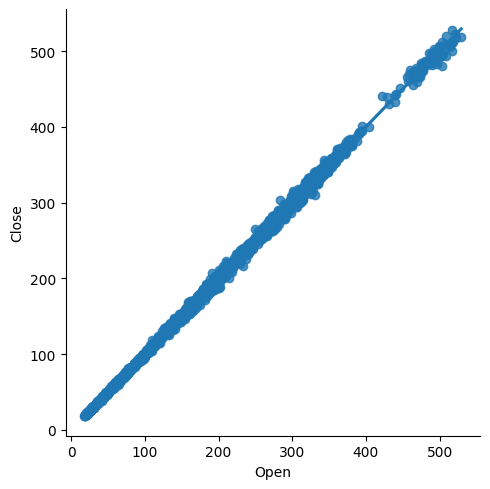

In [21]:
sns.lmplot(x='Open', y='Close', data=df)

By observe the plot, 

-'close' and 'open' have strong linear relationship which means that when opening price of stock is increased then also closing price of stock is increased.It is positive relationship.

-Points closely clustered around the line suggest a strong linear relationship. 

-the points in the scatter plot and the fitted regression line suggest an upward trend, this indicates a positive correlation between the opening price and the closing price. As the opening price during the day increases, the closing price also tends to increase.

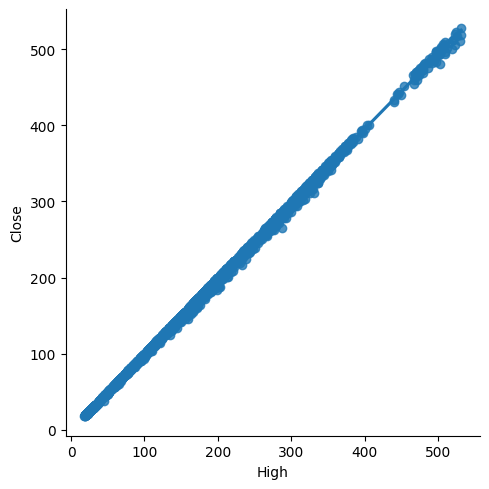

In [22]:
sns.lmplot(x='High', y='Close', data=df)

By observe the plot, 

-'close' and 'High' have strong linear relationship which means that when highest price of the stock during the trading day is increased then also closing price of stock is increased.It is positive relationship.

-the points in the scatter plot and the fitted regression line suggest an upward trend, this indicates a positive correlation between the highest price and the closing price. As the highest price during the day increases, the closing price also tends to increase.

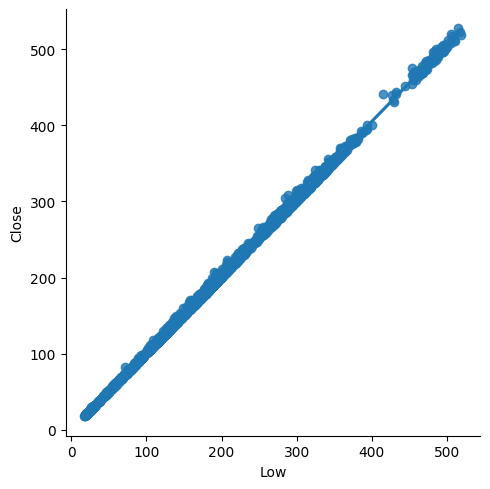

In [23]:
sns.lmplot(x='Low', y='Close', data=df)

By observe the plot, 

-'close' and 'Low' have strong linear relationship which means that when lowest price of the stock during the trading day is increased then also closing price of stock is increased.It is positive relationship.

-the points in the scatter plot and the fitted regression line suggest an upward trend, this indicates a positive correlation between the lowest price and the closing price. As the lowest price during the day increases, the closing price also tends to increase.

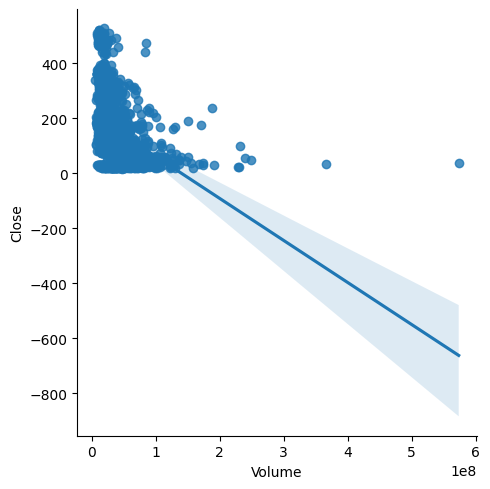

In [24]:
sns.lmplot(x='Volume', y='Close', data=df)

-it plots the relationship between the trading volume and the closing price of a stock.

-the points and the regression line suggest a downward trend, this indicates a negative correlation between trading volume and closing price. As volume increases, the closing price tends to decrease.

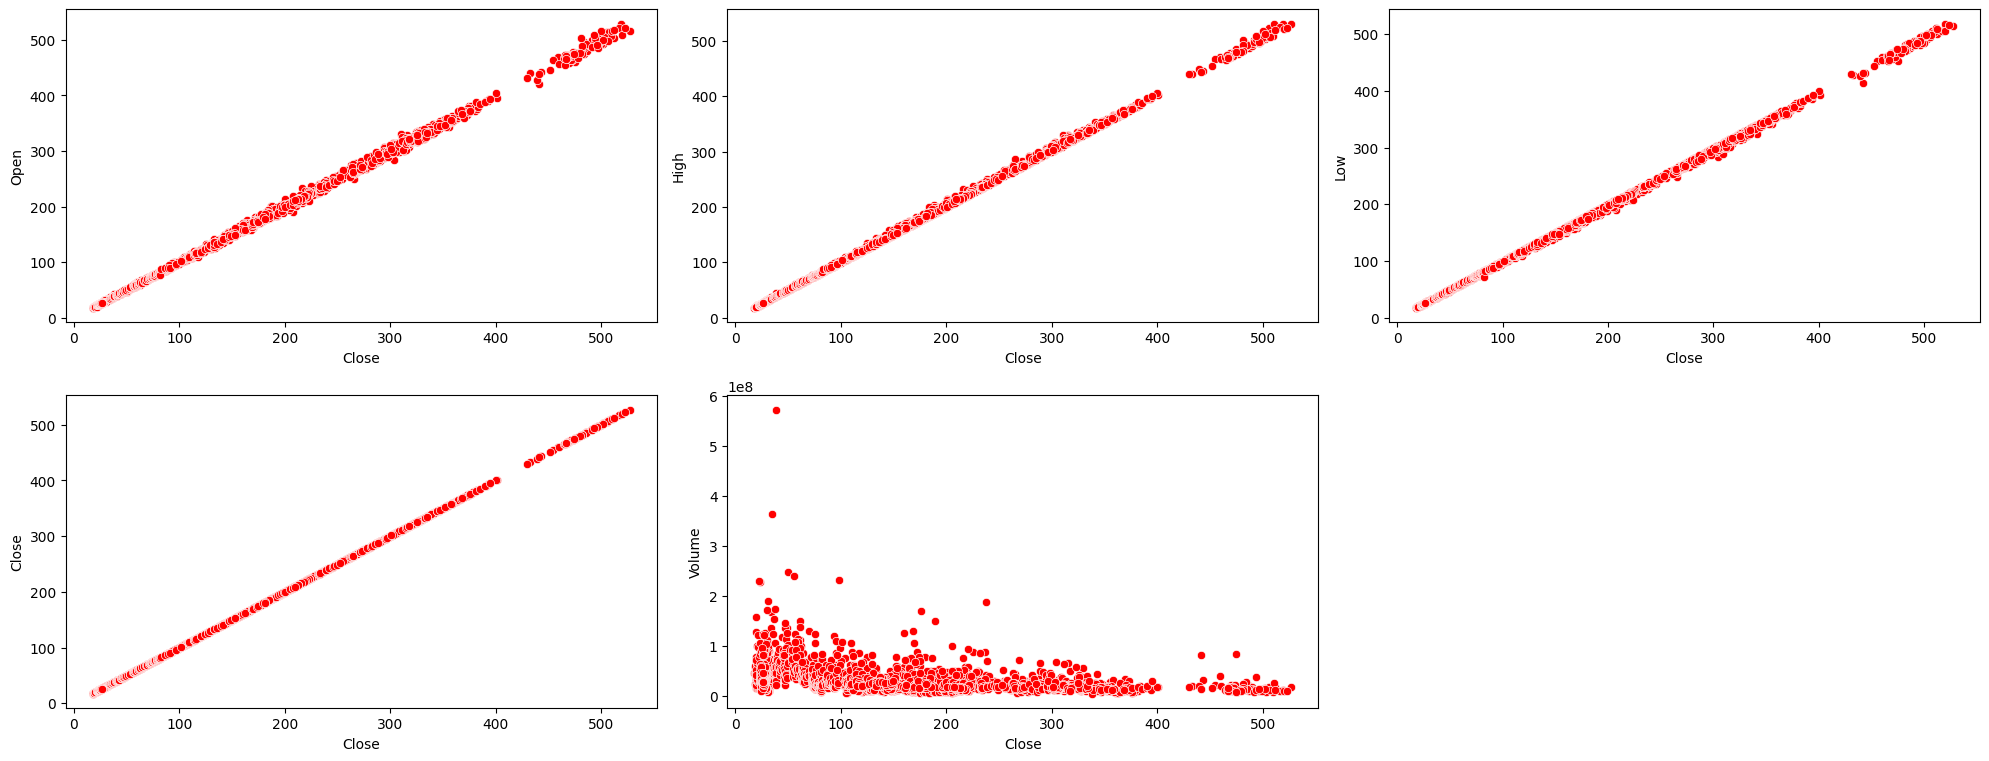

In [25]:
plt.figure(figsize=(20,15))
p =1

for col in df.columns:
    if p<6 :
        ax=plt.subplot(4,3,p)
        sns.scatterplot(x='Close', y=col, data=df, color='r')
    p+=1
plt.tight_layout()    

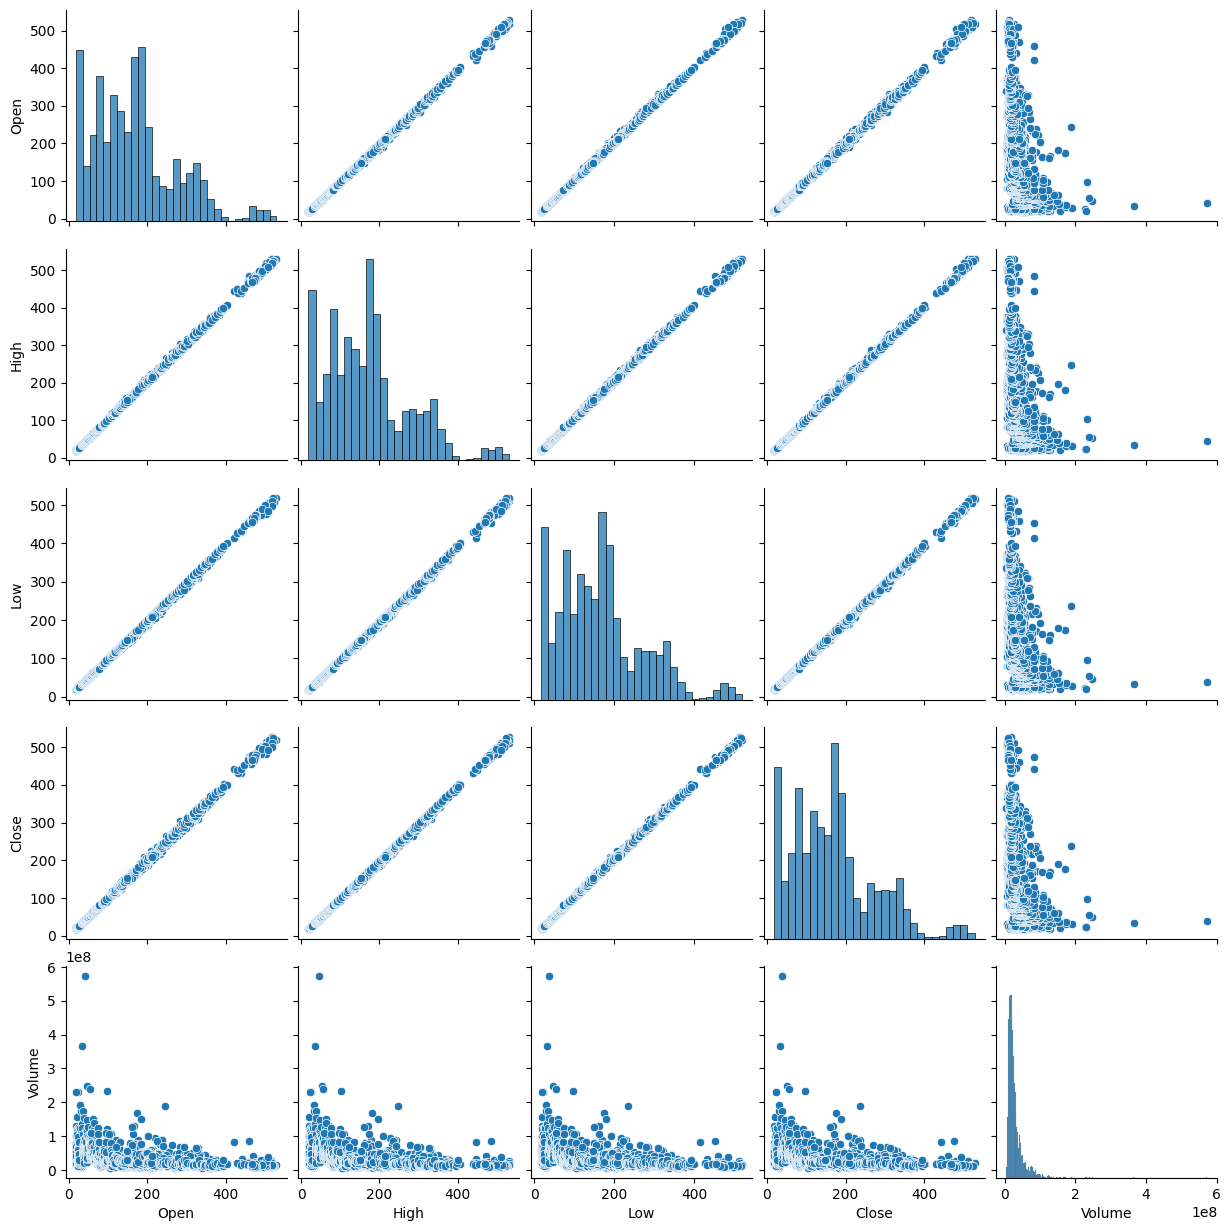

In [26]:
sns.pairplot(df)

The pairplot gives the pairwise relationship between the features. On the diagonal we can notice the distribution plot.

The features Low, High, Open has strong linear relation with each other and it has upward trends.

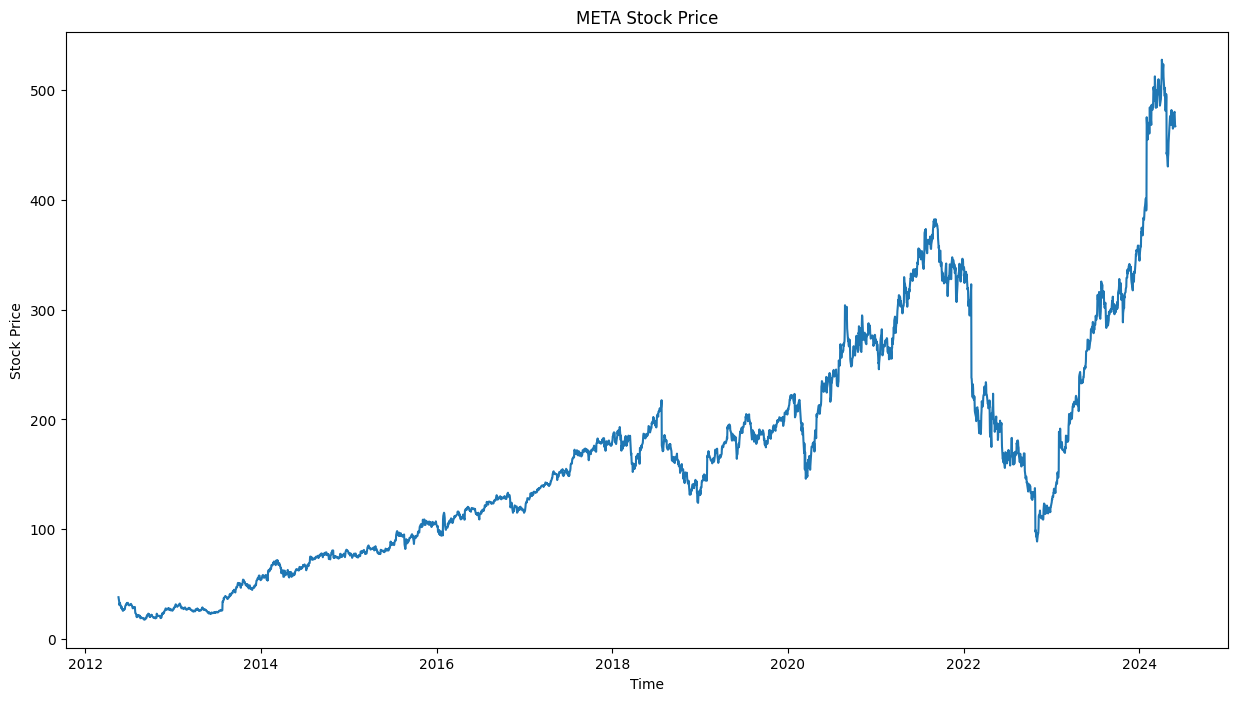

In [27]:
plt.figure(figsize=(15,8))
plt.plot(df.Close, label='Closing Price')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title('META Stock Price')
plt.show()

# Check Outliers

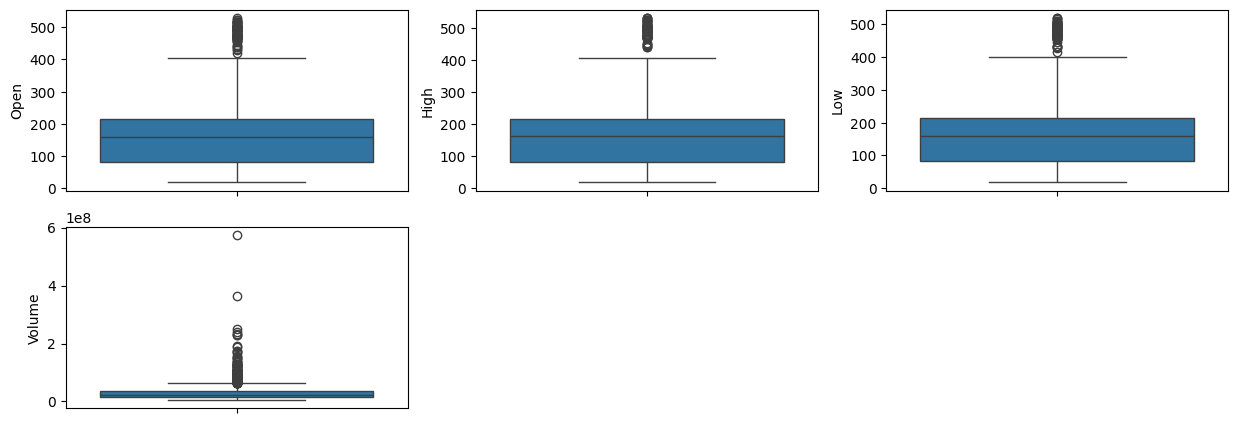

In [28]:
plt.figure(figsize=(15,8))
plotnumber = 1

for col in df[['Open','High','Low','Volume']]:
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col])
    plotnumber+=1
plt.show()    

Here we observe that the outliers are present in all columns.So we have to remove it using z-score.

# Applying a transformation method to reduce skewness and reduce the impact of extreme outliers to make extreme values less prominent

In [29]:
df[['Open', 'High', 'Low']] = np.cbrt(df[['Open', 'High', 'Low']])
df['Volume'] = np.log(df['Volume'])

In [30]:
from scipy.stats import zscore
f = df[['Open','High','Low','Volume']]
z_score = np.abs(zscore(f))

p =(z_score < 3).all(axis=1)
df1= df[p]
df1.describe()

,Open,High,Low,Close,Volume
count,3010.000000,3010.000000,3010.000000,3010.000000,3010.000000
mean,5.259926,5.282679,5.237422,168.783711,17.003642
std,1.221521,1.226220,1.217750,105.397824,0.571431
min,2.624618,2.633780,2.598717,17.730000,15.514332
25%,4.365964,4.376258,4.349861,83.002500,16.589720
50%,5.435951,5.469027,5.412841,160.629998,16.916548
75%,5.988938,6.021819,5.969662,216.370007,17.349580
max,8.089006,8.100249,8.035726,527.340027,18.748321


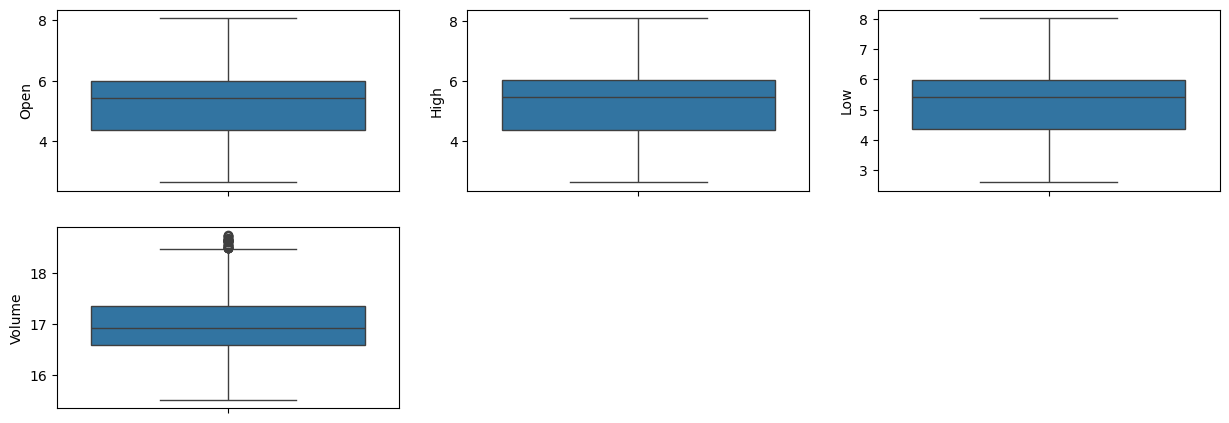

In [31]:
plt.figure(figsize=(15,8))
plotnumber = 1

for col in df1[['Open','High','Low','Volume']]:
    if plotnumber <= 6:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[col])
    plotnumber+=1
plt.show()

In [32]:
print('Old Dtaframe size : ',df.shape[0])
print('New Dtaframe size : ',df1.shape[0])

Old Dtaframe size :  3028
New Dtaframe size :  3010


In [33]:
print('Data Loss Percentage : ',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage :  0.59445178335535


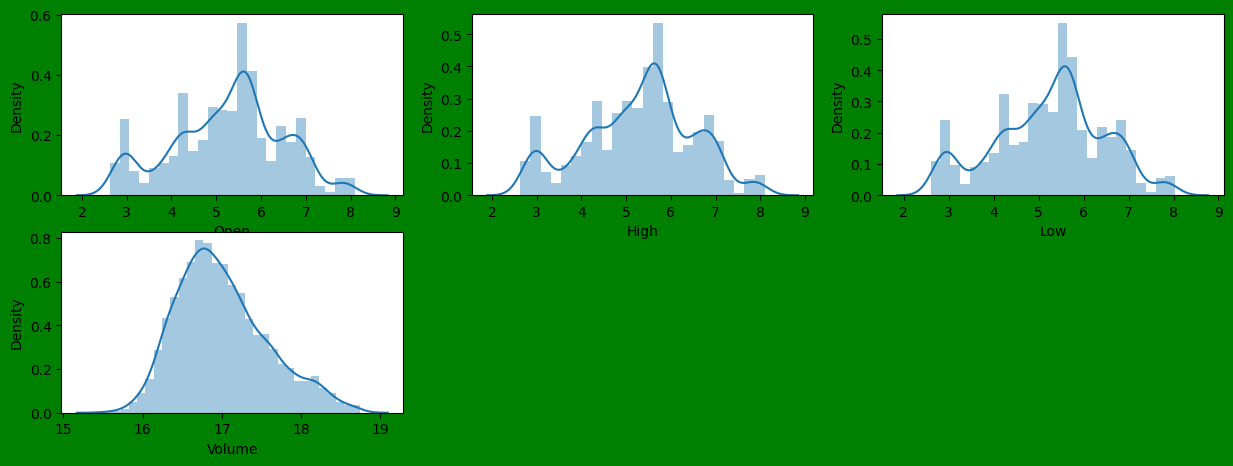

In [34]:
plt.figure(figsize=(15,8), facecolor='green')
p = 1

for i in df1[['Open','High','Low','Volume']]:
    if p <= 8:
        ax=plt.subplot(3,3,p)
        sns.distplot(df1[i])
    p+=1
plt.show()

By the plot the all columns are almost normally distributed.

# Check skewness

In [35]:
df1[['Open','High','Low','Volume']].skew()

Open     -0.202693
High     -0.200147
Low      -0.206605
Volume    0.568397
dtype: float64

In [36]:
df1['Volume'] = np.log(df1['Volume'])

In [37]:
df1.skew()

Open     -0.202693
High     -0.200147
Low      -0.206605
Close     0.854536
Volume    0.487311
dtype: float64

Now there is no skewness.

# Check Correlation

In [38]:
df1.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999859,0.999840,0.961318,-0.525763
High,0.999859,1.000000,0.999801,0.961674,-0.520609
Low,0.999840,0.999801,1.000000,0.961245,-0.531521
Close,0.961318,0.961674,0.961245,1.000000,-0.477536
Volume,-0.525763,-0.520609,-0.531521,-0.477536,1.000000


<Axes: >

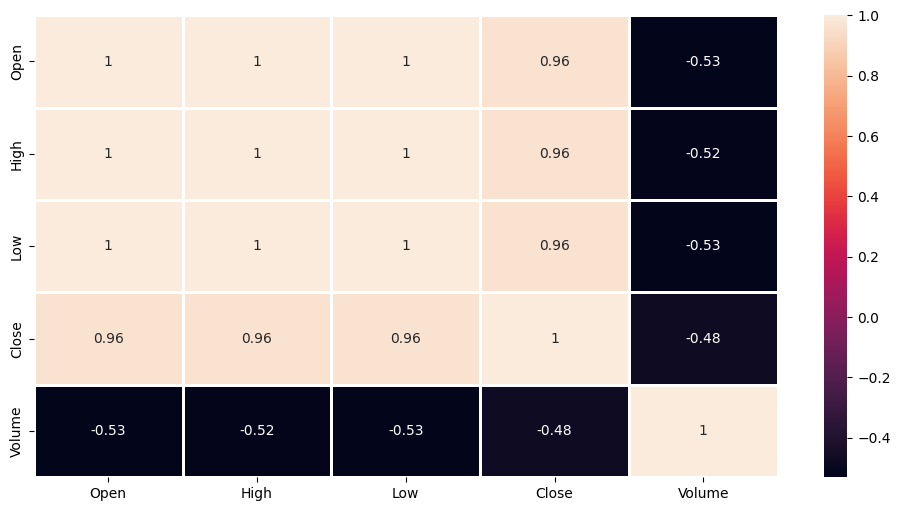

In [39]:
plt.figure(figsize=(12,6))
sns.heatmap(df1.corr(), annot=True, annot_kws={'size':10}, linecolor='white', linewidths=1)

In [40]:
df1.corr().Close.sort_values()

Volume   -0.477536
Low       0.961245
Open      0.961318
High      0.961674
Close     1.000000
Name: Close, dtype: float64

Here we observe that the 'Low','High','Open' are highly correlated with target variable.

# Separating the features and target variables

In [41]:
X = df1.drop('Close', axis=1)
y = df1['Close']

# Feature Scaling using StandardScaler to scale the data

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

,Features,VIF values
0,Open,4968.851313
1,High,5836.420699
2,Low,5268.661087
3,Volume,2.361026


Here all columns are highly correlate with target variable so we cannot delete any of these column.

# Find the best random state

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [45]:
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Maximum accuracy is ', maxAccu, 'on random state ', maxRS)

Maximum accuracy is  0.9349165774005025 on random state  104


# Model

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

In [47]:
# LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
LR_pred = LR.predict(x_test)
print(LR)
print('\n------------------------------------------')
print('Training Accuracy : {}'.format(r2_score(LR.predict(x_train),y_train)*100))
print('\n--------------------------------------------')
print('Testing Accuracy : {}'.format(r2_score(y_test,LR_pred)*100))
print('\n')
print('Mean Squared Error : ',mean_squared_error(y_test,LR_pred))
print('Mean Absolute Error : ',mean_absolute_error(y_test,LR_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,LR_pred)))

LinearRegression()

------------------------------------------
Training Accuracy : 91.6998915153909

--------------------------------------------
Testing Accuracy : 93.49165774005024


Mean Squared Error :  673.1707139284116
Mean Absolute Error :  20.500056438281145
Root Mean Squared Error :  25.945533602691842


In [48]:
# GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
GBR_pred = GBR.predict(x_test)
print(GBR)
print('\n------------------------------------------')
print('Training Accuracy : {}'.format(r2_score(GBR.predict(x_train),y_train)*100))
print('\n--------------------------------------------')
print('Testing Accuracy : {}'.format(r2_score(y_test,GBR_pred)*100))
print('\n')
print('Mean Squared Error : ',mean_squared_error(y_test,GBR_pred))
print('Mean Absolute Error : ',mean_absolute_error(y_test,GBR_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,GBR_pred)))

GradientBoostingRegressor()

------------------------------------------
Training Accuracy : 99.97936977679835

--------------------------------------------
Testing Accuracy : 99.95308078127223


Mean Squared Error :  4.852947602694342
Mean Absolute Error :  1.5413102528103355
Root Mean Squared Error :  2.2029406716238054


In [49]:
# ExtraTreesRegressor
ETR = ExtraTreesRegressor()
ETR.fit(x_train,y_train)
ETR_pred = ETR.predict(x_test)
print(ETR)
print('\n------------------------------------------')
print('Training Accuracy : {}'.format(r2_score(ETR.predict(x_train),y_train)*100))
print('\n--------------------------------------------')
print('Testing Accuracy : {}'.format(r2_score(y_test,ETR_pred)*100))
print('\n')
print('Mean Squared Error : ',mean_squared_error(y_test,ETR_pred))
print('Mean Absolute Error : ',mean_absolute_error(y_test,ETR_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,ETR_pred)))

ExtraTreesRegressor()

------------------------------------------
Training Accuracy : 99.99999999987008

--------------------------------------------
Testing Accuracy : 99.96952248971643


Mean Squared Error :  3.1523491753977413
Mean Absolute Error :  1.1826064003709933
Root Mean Squared Error :  1.775485616781432


In [50]:
# Ridge
R = Ridge()
R.fit(x_train,y_train)
R_pred = R.predict(x_test)
print(R)
print('\n------------------------------------------')
print('Training Accuracy : {}'.format(r2_score(R.predict(x_train),y_train)*100))
print('\n--------------------------------------------')
print('Testing Accuracy : {}'.format(r2_score(y_test,R_pred)*100))
print('\n')
print('Mean Squared Error : ',mean_squared_error(y_test,R_pred))
print('Mean Absolute Error : ',mean_absolute_error(y_test,R_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,R_pred)))

Ridge()

------------------------------------------
Training Accuracy : 91.68583043430219

--------------------------------------------
Testing Accuracy : 93.49638479112129


Mean Squared Error :  672.6817856856773
Mean Absolute Error :  20.5085047791996
Root Mean Squared Error :  25.93610968679916


# cross validation check

In [51]:
from sklearn.model_selection import cross_val_score,KFold

In [52]:
# LinearRegression
k = KFold(n_splits=5)
score = cross_val_score(LR,x,y,cv=k)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
(r2_score(y_test,LR_pred) - score.mean())*100

Cross Validation Score : [-21.20563312  -0.29931649  -1.14514948   0.86233343   0.78340307]
Average Cross Validation Score : -4.200872518682198

------------------


513.5789096082701

In [53]:
# GradientBoostingRegressor
k = KFold(n_splits=5)
score = cross_val_score(GBR,x,y,cv=k)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
(r2_score(y_test,GBR_pred) - score.mean())*100

Cross Validation Score : [-2.47761443  0.98733951  0.98775879  0.99709509  0.87922511]
Average Cross Validation Score : 0.27476081588089035

------------------


72.4769991931832

In [54]:
# ExtraTreesRegressor
k = KFold(n_splits=5)
score = cross_val_score(ETR,x,y,cv=k)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
(r2_score(y_test,ETR_pred) - score.mean())*100

Cross Validation Score : [-2.36771213  0.99715647  0.99358066  0.99794189  0.88102376]
Average Cross Validation Score : 0.30039812767809304

------------------


69.92970972190712

In [55]:
# Ridge
k = KFold(n_splits=5)
score = cross_val_score(R,x,y,cv=k)
print("Cross Validation Score : {}".format(score))
print("Average Cross Validation Score : {}".format(score.mean()))
print("\n------------------")
(r2_score(y_test,R_pred) - score.mean())*100

Cross Validation Score : [-21.22898133  -0.26552529  -1.14406926   0.87069264   0.78501638]
Average Cross Validation Score : -4.196573373947658

------------------


513.1537221858871

# From the difference of both R2 score and cross validation score we can conclude that "ExtraTrees Regressor" is our best fit and best performing model

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters = {
    'n_estimators' : [50,100,150],
    'criterion' : ['squared_error', 'absolute_error'],
    'min_samples_split' : [2.5,5,2],
    'min_samples_leaf': [1,5,3],
    'max_features' : ['sqrt','log2']
}

In [58]:
etcv = GridSearchCV(ExtraTreesRegressor(), parameters, cv=5)

In [59]:
etcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 3],
                         'min_samples_split': [2.5, 5, 2],
                         'n_estimators': [50, 100, 150]})

In [60]:
etcv.best_params_

{'criterion': 'squared_error',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [61]:
final_model = ExtraTreesRegressor(criterion= 'squared_error', max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
print('\n------------------------------------------')
print('Testing Accuracy : {}'.format(r2_score(y_test,pred)*100))
print('\n')
print('Mean Squared Error : ',mean_squared_error(y_test,pred))
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,pred)))


------------------------------------------
Testing Accuracy : 99.96995861581325


Mean Squared Error :  3.1072397905129145
Mean Absolute Error :  1.1812564052953123
Root Mean Squared Error :  1.7627364495332007


# Save Model

In [62]:
# Save the model
import joblib

joblib.dump(final_model, 'Meta_Stock_Prediction.pkl')

['Meta_Stock_Prediction.pkl']

In [63]:
# Load the model
l = joblib.load('Meta_Stock_Prediction.pkl')

In [64]:
f_pred = l.predict(x_test)

actual = np.array(y_test)

In [65]:
pd.DataFrame({
    'Actual' : actual,
    'Prediction' : f_pred
})

,Actual,Prediction
0,182.039993,181.331797
1,62.750000,62.671933
2,467.779999,472.132601
3,104.070000,107.564133
4,137.419998,137.048064
...,...,...
597,254.820007,250.445334
598,99.540001,98.433067
599,204.929993,201.448866
600,50.230000,50.925801
